In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [4]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
missing_values = ["n/a", "na", "--"]

In [10]:
df = pd.read_csv("property_data.csv",
                na_values = missing_values)

FileNotFoundError: [Errno 2] No such file or directory: 'property_data.csv'

In [11]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [12]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [13]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [14]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [15]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,
'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [16]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [17]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [18]:
df.isnull().values.any()

True

In [19]:
df.isnull().sum().sum()

9

In [20]:
df['ST_NUM'].fillna(125, inplace=True)

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values = missing_values)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [22]:
df.loc[2, 'ST_NUM'] = 125
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [23]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [24]:
!pip install xlrd

In [25]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [26]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [27]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [28]:
data_age.rename(columns={'Unnamed: 0':'Year'}, inplace = True)
data_age.head(1)

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_age.dropna(inplace=True)

In [30]:
data_age.set_index('Year', inplace=True)

In [31]:
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

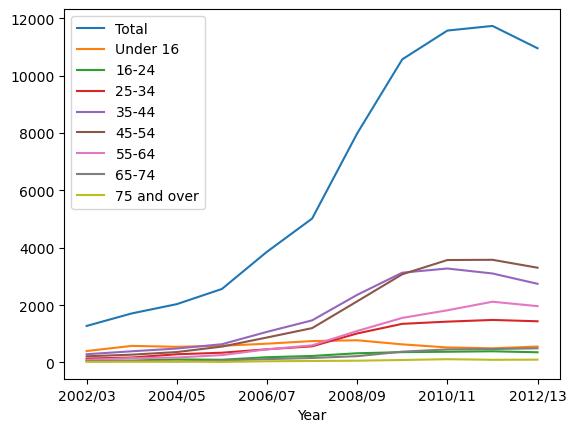

In [32]:
data_age.plot()

In [33]:
data_age_minus_total = data_age.drop('Total', axis = 1)
data_age_minus_total

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<Axes: xlabel='Year'>

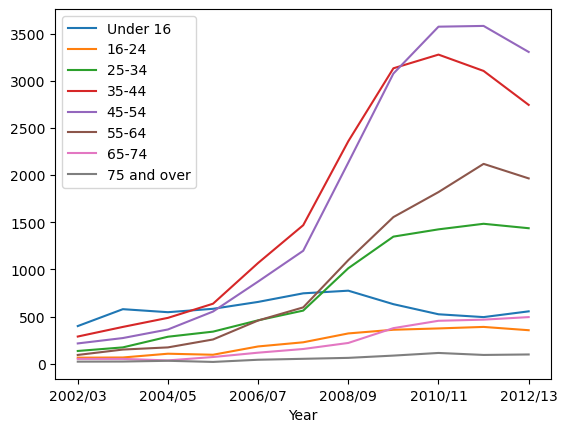

In [34]:
data_age_minus_total.plot()

<Axes: xlabel='Year'>

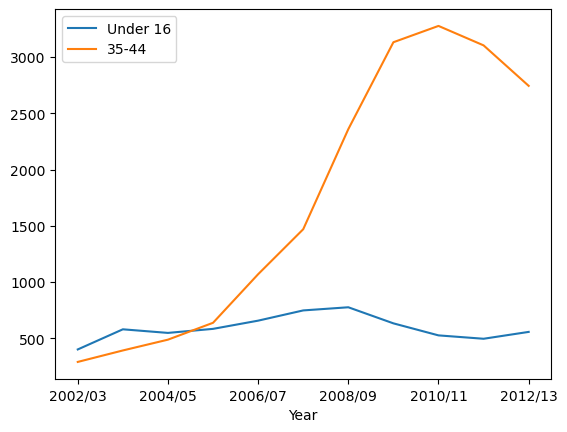

In [35]:
data_age['Under 16'].plot(label='Under 16', legend=True)
data_age['35-44'].plot(label='35-44', legend=True)

In [36]:
from datetime import datetime

In [37]:
date_rng = pd.date_range(start = '1/01/2020', end = '1/08/2020', freq = 'H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [38]:
type(date_rng)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
df = pd.DataFrame(date_rng, columns = ['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [40]:
df['data'] = np.random.randint(0,100, size=(len(date_rng)))
df

,date,data
0,2020-01-01 00:00:00,58
1,2020-01-01 01:00:00,56
2,2020-01-01 02:00:00,59
3,2020-01-01 03:00:00,93
4,2020-01-01 04:00:00,75
...,...,...
164,2020-01-07 20:00:00,63
165,2020-01-07 21:00:00,42
166,2020-01-07 22:00:00,86
167,2020-01-07 23:00:00,32


In [41]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,58
2020-01-01 01:00:00,2020-01-01 01:00:00,56
2020-01-01 02:00:00,2020-01-01 02:00:00,59
2020-01-01 03:00:00,2020-01-01 03:00:00,93
2020-01-01 04:00:00,2020-01-01 04:00:00,75
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,63
2020-01-07 21:00:00,2020-01-07 21:00:00,42
2020-01-07 22:00:00,2020-01-07 22:00:00,86


In [42]:
df.drop(['date'], axis = 1)

,data
datetime,
2020-01-01 00:00:00,58
2020-01-01 01:00:00,56
2020-01-01 02:00:00,59
2020-01-01 03:00:00,93
2020-01-01 04:00:00,75
...,...
2020-01-07 20:00:00,63
2020-01-07 21:00:00,42
2020-01-07 22:00:00,86


In [45]:
type(date_rng[0])
type(string_date_rng[0])

str

In [44]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [46]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format = True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [47]:
type(timestamp_date_rng[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
string_date_rng_2 = ['01-June-2020','02-June-2020','03-June-2020']

In [49]:
timestamp_date_rng_2 = [datetime.strptime(x, '%d-%B-%Y') for x in string_date_rng_2]
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [50]:
type(timestamp_date_rng_2[0])

datetime.datetime

In [51]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns = ['date'])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [52]:
df.index.day

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 8],
           dtype='int64', name='datetime', length=169)

In [53]:
df[df.index.day == 2]

,date,data
datetime,,
2020-01-02 00:00:00,2020-01-02 00:00:00,10
2020-01-02 01:00:00,2020-01-02 01:00:00,13
2020-01-02 02:00:00,2020-01-02 02:00:00,25
2020-01-02 03:00:00,2020-01-02 03:00:00,71
2020-01-02 04:00:00,2020-01-02 04:00:00,68
2020-01-02 05:00:00,2020-01-02 05:00:00,26
2020-01-02 06:00:00,2020-01-02 06:00:00,3
2020-01-02 07:00:00,2020-01-02 07:00:00,25
2020-01-02 08:00:00,2020-01-02 08:00:00,37


In [54]:
df['2020-01-04':'2020-01-06']

,date,data
datetime,,
2020-01-04 00:00:00,2020-01-04 00:00:00,89
2020-01-04 01:00:00,2020-01-04 01:00:00,3
2020-01-04 02:00:00,2020-01-04 02:00:00,20
2020-01-04 03:00:00,2020-01-04 03:00:00,64
2020-01-04 04:00:00,2020-01-04 04:00:00,11
...,...,...
2020-01-06 19:00:00,2020-01-06 19:00:00,79
2020-01-06 20:00:00,2020-01-06 20:00:00,8
2020-01-06 21:00:00,2020-01-06 21:00:00,11


In [55]:
df.resample('D').mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8288\941734378.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('D').mean()


,data
datetime,
2020-01-01,61.291667
2020-01-02,44.458333
2020-01-03,49.416667
2020-01-04,52.291667
2020-01-05,46.000000
2020-01-06,50.083333
2020-01-07,53.958333
2020-01-08,42.000000


In [56]:
df.groupby('data')

In [57]:
df['rolling_sum'] = df.rolling(3).sum()
df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8288\4116112394.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  df['rolling_sum'] = df.rolling(3).sum()


,date,data,rolling_sum
datetime,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,58,NaN
2020-01-01 01:00:00,2020-01-01 01:00:00,56,NaN
2020-01-01 02:00:00,2020-01-01 02:00:00,59,173.0
2020-01-01 03:00:00,2020-01-01 03:00:00,93,208.0
2020-01-01 04:00:00,2020-01-01 04:00:00,75,227.0
...,...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,63,183.0
2020-01-07 21:00:00,2020-01-07 21:00:00,42,178.0
2020-01-07 22:00:00,2020-01-07 22:00:00,86,191.0


In [58]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method = 'backfill')
df.head()

,date,data,rolling_sum,rolling_sum_backfilled
datetime,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,58,NaN,173.0
2020-01-01 01:00:00,2020-01-01 01:00:00,56,NaN,173.0
2020-01-01 02:00:00,2020-01-01 02:00:00,59,173.0,173.0
2020-01-01 03:00:00,2020-01-01 03:00:00,93,208.0,208.0
2020-01-01 04:00:00,2020-01-01 04:00:00,75,227.0,227.0


In [60]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [63]:
display(opsd_daily.shape)
opsd_daily

(4383, 5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [66]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [68]:
opsd_daily.set_index('Date', inplace=True)

In [69]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [71]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [72]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [73]:
opsd_daily.index[0]

Timestamp('2006-01-01 00:00:00')

In [74]:
opsd_daily.loc['2006-01-05']

Consumption    1477.131
Wind                NaN
Solar               NaN
Wind+Solar          NaN
Year           2006.000
Month             1.000
Weekday           3.000
Name: 2006-01-05 00:00:00, dtype: float64

In [75]:
opsd_daily.loc['2006-01-05':'2006-01-10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
2006-01-06,1403.427,NaN,NaN,NaN,2006,1,4
2006-01-07,1300.287,NaN,NaN,NaN,2006,1,5
2006-01-08,1207.985,NaN,NaN,NaN,2006,1,6
2006-01-09,1529.323,NaN,NaN,NaN,2006,1,0
2006-01-10,1576.911,NaN,NaN,NaN,2006,1,1


In [76]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


<Axes: xlabel='Date'>

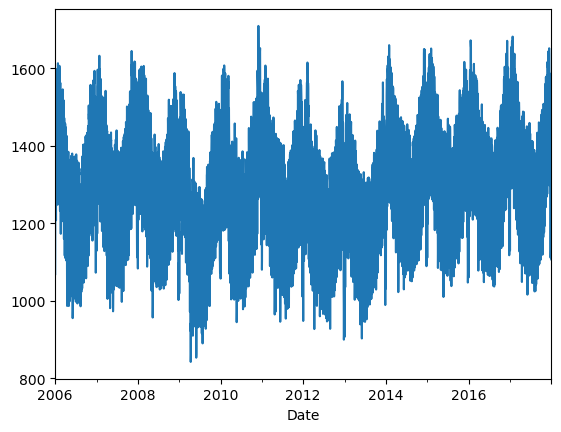

In [77]:
opsd_daily['Consumption'].plot()

<Axes: xlabel='Date'>

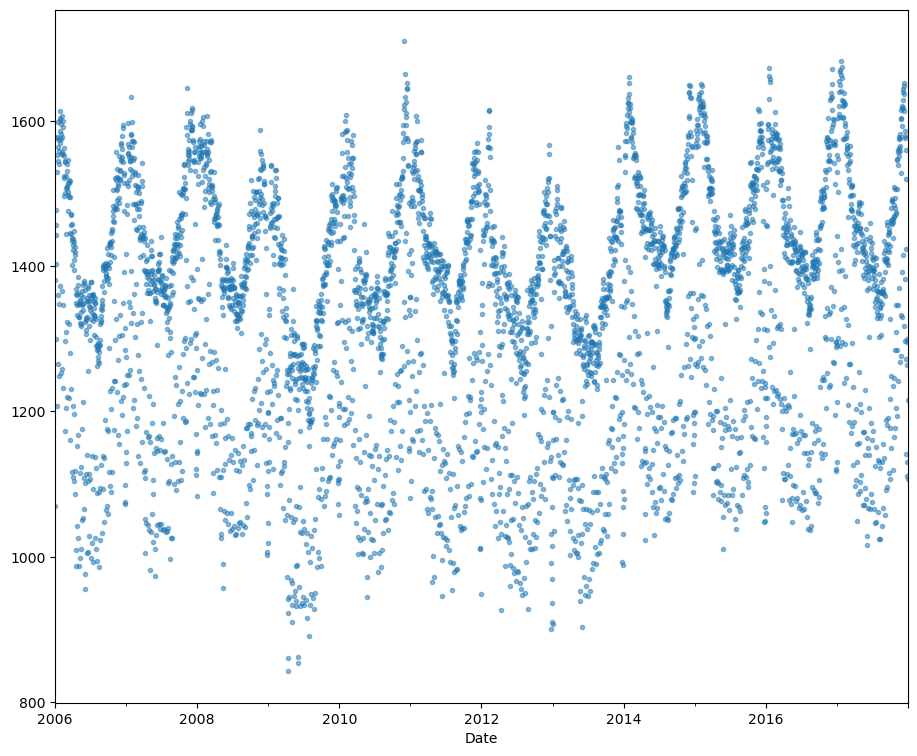

In [80]:
opsd_daily['Consumption'].plot(marker='.', alpha = 0.5, linestyle = 'None', figsize=(11,9))

<Axes: xlabel='Date'>

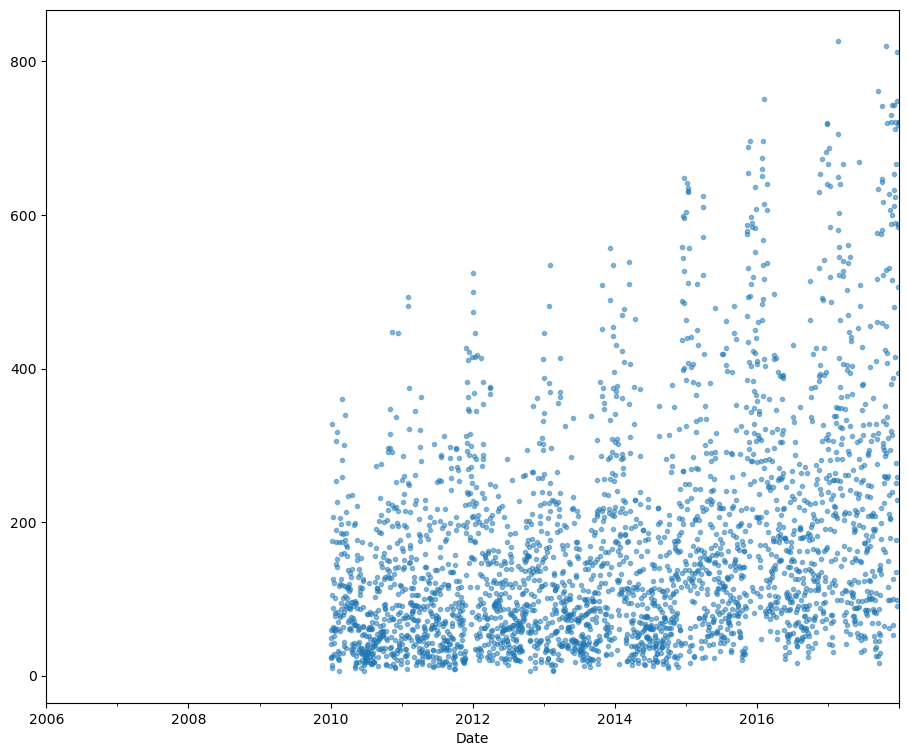

In [81]:
opsd_daily['Wind'].plot(marker='.', alpha = 0.5, linestyle = 'None', figsize=(11,9))

<Axes: xlabel='Date'>

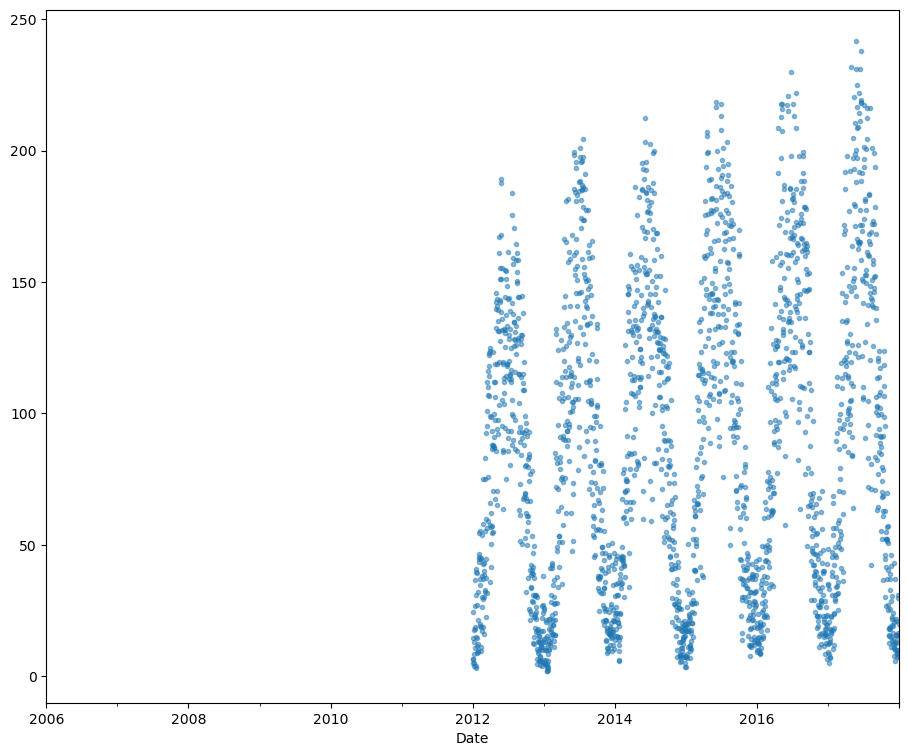

In [82]:
opsd_daily['Solar'].plot(marker='.', alpha = 0.5, linestyle = 'None', figsize=(11,9))

<Axes: xlabel='Date'>

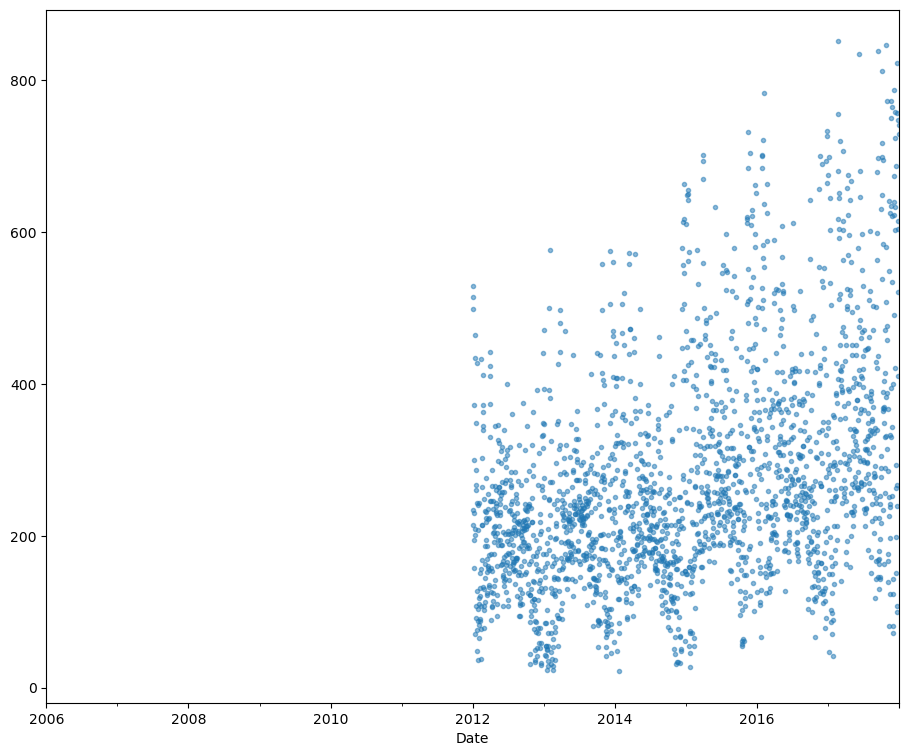

In [83]:
opsd_daily['Wind+Solar'].plot(marker='.', alpha = 0.5, linestyle = 'None', figsize=(11,9))